# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 13 : Individual Notebook 2
### Enter your name, studienummer and date of birth below

In [1]:
print('Name: Haoyang Liang')
print('Studienummer: 4637887')
print('Date of birth: 19970122')

Name: Haoyang Liang
Studienummer: 4637887
Date of birth: 19970122


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1
The file `poly_fit_data.dat` contains 21 measurements of $x$ (first row) and $y$ (second row). Fit a polynomial of degree $N$ through the data. Use N = 1, 2, 3, 4. You must use a loop. Plot the data and all four fitted polynomials on one graph. Print to the screen the degree of the polynomial and the corresponding root mean square error. 

Degree 1 : 744.859188355
Degree 2 : 761.93791799
Degree 3 : 674.539518168
Degree 4 : 689.750226202


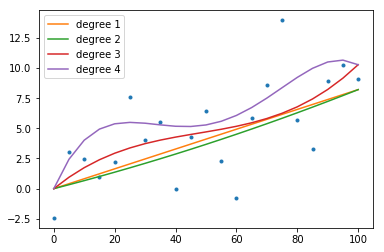

In [3]:
from scipy.optimize import curve_fit
x, y = np.loadtxt('poly_fit_data.dat')
plt.plot(x,y,'.')
for N in range(4):
    result = np.polyfit(x, y, N + 1)
    yfit = 0
    for i in range(N + 1):
        yfit += result[i] * x ** (N - i + 1)
    s = 0
    for i in range(len(x)):
        s += s + (yfit[i]- y[i]) ** 2
    E = (1 / len(x) * s) ** 0.5
    plt.plot(x,yfit,label = 'degree '+str(N + 1))
    print('Degree', N + 1, ':', E)
plt.legend()

### Question 2
The file `rotterdam_weather_2000_2010.csv` contains daily weather data at Rotterdam from 2000 through 2010. The column labeled `TG` contains the daily average temperature. Read the header of the `csv` file to understand the units. Determine and print to the screen the minimum and the maximum mean monthly temperature in degrees Celcius for the period 2000 - 2010 .

In [4]:
from pandas import read_csv
data = read_csv('rotterdam_weather_2000_2010.csv', skiprows = 11, skipinitialspace=True, index_col='YYYYMMDD', parse_dates=[1])
data.TG = data.TG * 0.1
monthlymeanTG = data.TG.resample('M', kind='period').mean()
monthlyminTG = monthlymeanTG.resample('A', kind='period').min()
monthlymaxTG = monthlymeanTG.resample('A', kind='period').max()
print('minimum mean monthly temperature')
print(monthlyminTG)
print('maximum mean monthly temperature')
print(monthlymaxTG)

minimum mean monthly temperature
YYYYMMDD
2000    4.790323
2001    3.174194
2002    3.493548
2003    2.760714
2004    3.983871
2005    2.792857
2006    2.161290
2007    4.122581
2008    2.606452
2009    1.235484
2010   -0.364516
Freq: A-DEC, Name: TG, dtype: float64
maximum mean monthly temperature
YYYYMMDD
2000    17.590323
2001    18.532258
2002    18.667742
2003    19.012903
2004    18.983871
2005    17.612903
2006    22.161290
2007    17.270968
2008    18.016129
2009    19.138710
2010    19.564516
Freq: A-DEC, Name: TG, dtype: float64


### Question 3
Write a function that draws $N$ ellipses on one graph. The center of all ellipses is at $(x,y)=(0,0)$, the width is 20 and the height is 1. The angle that the major axis makes with the horizontal varies from 0 degrees to 180 degrees with steps of 180/N degrees. The function takes as input argument the number $N$ and produces the figure. Demonstrate your function works by producing figures for $N=10$ and $N=20$.

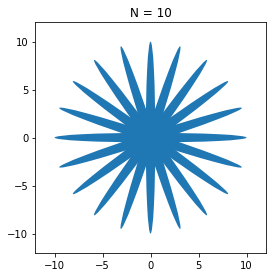

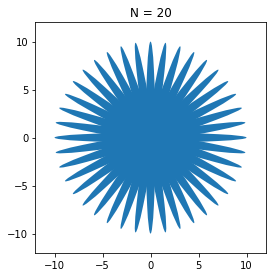

In [5]:
from matplotlib.patches import Ellipse
def drawellipse(N):
    elist = []
    for i in range(N):
        e = Ellipse(xy = (0,0), width = 20, height = 1, angle = 180/ N * i)
        elist.append(e)
    fig = plt.figure()
    ax = fig.add_axes([.1, .1, .8, .8], aspect='equal')
    for i in range(N):
        ax.add_patch(elist[i])
    ax.autoscale()
    plt.xlim(-12,12)
    plt.ylim(-12,12)
    plt.title('N = '+str(N))
drawellipse(10)
drawellipse(20)

### Exercise 4
Five friends go shopping and buy the following fruit:

* Karel buys 2 pears, 10 strawberries, 3 apples and a kiwi. He has to pay €4,60.
* Daniel buys 5 strawberries, a pineapple and 2 kiwis. He has to pay €3,50.
* Sara buys 2 apples, a kiwi and 2 pineapples. She has to pay €4,70.
* Thomas buys a pear, an apple, 6 strawberries and a kiwi. He has to pay €2,52.
* Martha buys 20 strawberries, an apple and a pear. She has to pay €3,50.

They now want to know how much each piece of fruit costs.  Build a system of five equations and five unknowns and solve the system. Use a loopt to print to the screen the price of one piece of each of the five fruits with the corresponing fruit names.

In [6]:
A = np.zeros((5,5))
fruit = ['pear', 'strawberry', 'apple', 'pineapple', 'kiwi']
A[0,:] = [2,10,3,0,1]
A[1,:] = [0,5,0,1,2]
A[2,:] = [0,0,2,2,1]
A[3,:] = [1,6,1,0,1]
A[4,:] = [1,20,1,0,0]
y = [4.6,3.5,4.7,2.52,3.5]
Avin = np.linalg.inv(A)
sol = Avin @ y
for i in range(5):
    print(fruit[i], ':', sol[i])

pear : 0.6
strawberry : 0.12
apple : 0.5
pineapple : 1.5
kiwi : 0.7


### Exercise 5. Find the bugs
The following code contains at least 4 bugs. Fix them such that a nice figure appears. 

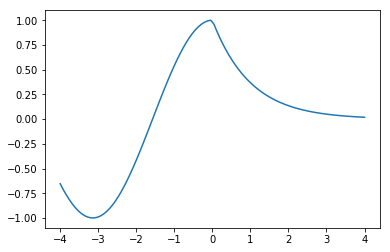

In [7]:
def func(x):
    '''
    y = cos(x) for x < 0
    y = exp(-x) for x > 0
    '''
    if (x < 0):
        y = np.cos(x)
    else:
        y = np.exp(-x)
    return y
    
x = np.linspace(-4, 4, 100)
y = np.zeros_like(x)

for i in range(len(x)):
    y[i] = func(x[i])
plt.plot(x, y);